In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load the datasets
train_data = pd.read_csv('Sets/pca/train_data_pca.csv')
val_data = pd.read_csv('Sets/pca/val_data_pca.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
val_predicted_labels = dt_classifier.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, val_predicted_labels)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predicted_labels))



Validation set accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       350
           1       0.91      0.91      0.91       136
           2       0.91      0.88      0.89       510
           3       0.83      0.82      0.83       244
           4       0.81      0.84      0.83       257
           5       1.00      1.00      1.00       525
           6       0.98      0.95      0.96       392
           7       0.92      0.95      0.94       122

    accuracy                           0.92      2536
   macro avg       0.91      0.91      0.91      2536
weighted avg       0.92      0.92      0.92      2536


Confusion Matrix:
[[335   0   7   2   4   0   0   2]
 [  0 124   0   4   3   0   5   0]
 [ 14   0 447  17  28   0   0   4]
 [  5   8  12 201  13   0   3   2]
 [  8   0  20   9 217   0   1   2]
 [  0   0   0   0   0 525   0   0]
 [  0   5   5   8   2   0 372   0]
 [  3   0   1   0   2   0   0 1

Validation set accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       350
           1       1.00      0.95      0.97       136
           2       0.97      0.97      0.97       510
           3       0.89      0.98      0.94       244
           4       0.96      0.91      0.94       257
           5       1.00      1.00      1.00       525
           6       1.00      0.99      0.99       392
           7       1.00      0.99      1.00       122

    accuracy                           0.98      2536
   macro avg       0.98      0.97      0.98      2536
weighted avg       0.98      0.98      0.98      2536


Confusion Matrix:
[[348   0   1   1   0   0   0   0]
 [  0 129   2   4   0   0   1   0]
 [  0   0 495   7   8   0   0   0]
 [  0   0   3 240   1   0   0   0]
 [  0   0   9  13 235   0   0   0]
 [  0   0   0   0   0 525   0   0]
 [  0   0   1   3   1   0 387   0]
 [  0   0   0   1   0   0   0 1

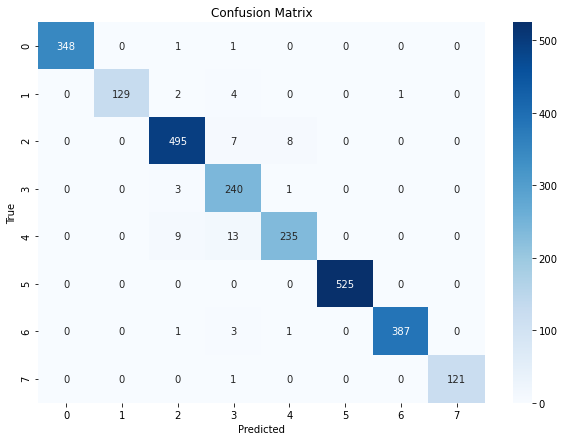

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('Sets/pca/train_data_pca.csv')
val_data = pd.read_csv('Sets/pca/val_data_pca.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
val_predicted_labels = rf_classifier.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, val_predicted_labels)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels))

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('Sets/pca/train_data_pca.csv')
val_data = pd.read_csv('Sets/pca/val_data_pca.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

# Initialize the Gradient Boosting classifier
#gbm_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier on the training data
#gbm_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
#val_predicted_labels = gbm_classifier.predict(X_val)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)
best_gbm_classifier = grid_search.best_estimator_
val_predicted_labels_gbm = best_gbm_classifier.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, val_predicted_labels_gbm)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels_gbm))

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels_gbm)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def run_my_code(train_data, val_data, test_data):
    X_train = train_data.drop(columns=['label'])
    y_train = train_data['label']
    X_val = val_data.drop(columns=['label'])
    y_val = val_data['label']

    # The Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)
    val_predicted_labels_D = dt_classifier.predict(X_val)

    # The Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    val_predicted_labels_f = rf_classifier.predict(X_val)

    # The Gradient Boosting classifier
    gbm_classifier = GradientBoostingClassifier(random_state=42)
    gbm_classifier.fit(X_train, y_train)
    val_predicted_labels_gbm = gbm_classifier.predict(X_val)

    result = [y_val, val_predicted_labels_D, val_predicted_labels_f, val_predicted_labels_gbm]
    return result

def load_datasets(subfolder_path, subfolder):
    train_data_path = os.path.join(subfolder_path, f'train_data_{subfolder}.csv')
    val_data_path = os.path.join(subfolder_path, f'val_data_{subfolder}.csv')
    test_data_path = os.path.join(subfolder_path, f'test_data_{subfolder}.csv')
    
    train_data = pd.read_csv(train_data_path)
    val_data = pd.read_csv(val_data_path)
    test_data = pd.read_csv(test_data_path)
    
    return train_data, val_data, test_data

def process_datasets(main_folder):
    types = ['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Processing folder: {subfolder}")
            train_data, val_data, test_data = load_datasets(subfolder_path, subfolder)
            result = run_my_code(train_data, val_data, test_data)
            for i in range(1, len(result)):
                accuracy = accuracy_score(result[0], result[i])
                print(f'Validation set accuracy {types[i-1]}: {accuracy:.2f}')

                # Print classification report
                print("\nClassification Report:")
                print(classification_report(result[0], result[i]))

            print("-" * 60)

# Example usage
main_folder = 'Sets'  # Replace with your actual path
process_datasets(main_folder)


Processing folder: org
Validation set accuracy DecisionTreeClassifier: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       350
           1       0.64      0.65      0.64       136
           2       0.78      0.78      0.78       510
           3       0.62      0.64      0.63       244
           4       0.64      0.59      0.62       257
           5       1.00      1.00      1.00       525
           6       0.89      0.87      0.88       392
           7       0.94      0.93      0.93       122

    accuracy                           0.83      2536
   macro avg       0.80      0.80      0.80      2536
weighted avg       0.83      0.83      0.83      2536

Validation set accuracy RandomForestClassifier: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       350
           1       0.90      0.76      0.82       136
         